# Pandas data manipulation and transformation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
path = 'C://Users//hussainsarfraz//0_Oxford_Course'
os. chdir(path) #path would be the new working directory
os. getcwd() #getting current working directory
imdb_movies = pd.read_csv("1.7_excel_imdb-movies.csv")
imdb_movies.shape

(1000, 11)

In [3]:
imdb_movies.head(5) #we need to assign the dataframe index to the rank column

,Rank,Title,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.13,76.0,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.46,65.0,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
2,3,Split,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,2016,123,6.2,393727,325.02,40.0,"Will Smith, Jared Leto, Margot Robbie, Viola D..."


In [4]:
imdb_movies.set_index('Rank', inplace=True) #setting the dataframe index with the rank column
imdb_movies.shape

(1000, 10)

In [5]:
imdb_movies.head(5) #the index is now replaced with the rank column

,Title,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors
Rank,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.13,76.0,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.46,65.0,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
3,Split,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,2016,123,6.2,393727,325.02,40.0,"Will Smith, Jared Leto, Margot Robbie, Viola D..."


In [6]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Director            1000 non-null   object 
 3   Year                1000 non-null   int64  
 4   Runtime (Minutes)   1000 non-null   int64  
 5   Rating              1000 non-null   float64
 6   Votes               1000 non-null   int64  
 7   Revenue (Millions)  872 non-null    float64
 8   Metascore           936 non-null    float64
 9   Actors              1000 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 85.9+ KB


### Question 1A: Do movies longer than 2h45 get better scores than movies shorter than 100 mins?

In [7]:
imdb_movies[imdb_movies['Runtime (Minutes)'] < 100]['Rating'].mean()

np.float64(6.2830645161290315)

In [8]:
imdb_movies[imdb_movies['Runtime (Minutes)'] > 165]['Rating'].mean()

np.float64(7.790909090909091)

In [9]:
print('Mean rating of movies less than 100 min:', imdb_movies[imdb_movies['Runtime (Minutes)'] < 100]['Metascore'].mean(),
      '\n',
     'Mean rating of movies more than 2hr 45min:', imdb_movies[imdb_movies['Runtime (Minutes)'] > 165]['Metascore'].mean())

Mean rating of movies less than 100 min: 55.86784140969163 
 Mean rating of movies more than 2hr 45min: 67.22222222222223


In [10]:
print('Mean rating of movies less than 100 min:', imdb_movies[imdb_movies['Runtime (Minutes)'] <= 100]['Rating'].mean(),
      '\n',
     'Mean rating of movies more than 2hr 45min:', imdb_movies[imdb_movies['Runtime (Minutes)'] >= 165]['Rating'].mean())

Mean rating of movies less than 100 min: 6.316304347826087 
 Mean rating of movies more than 2hr 45min: 7.675


### Question 1B: Visualise the response to 1A with an appropriate plot (matplotlib)

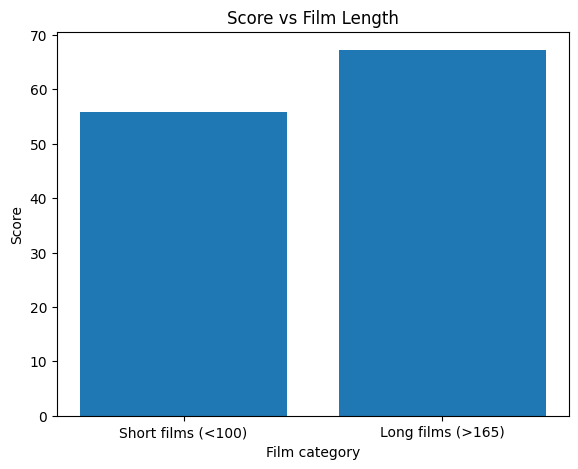

In [11]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])    

labels = ['Short films (<100)', 'Long films (>165)']
scores = [imdb_movies[imdb_movies['Runtime (Minutes)'] < 100]['Metascore'].mean(), #mean of movie rating less than 100 min
          imdb_movies[imdb_movies['Runtime (Minutes)'] > 165]['Metascore'].mean()] #mean of movie ratings more that 2hr 45min

ax.set_xlabel('Film category')
ax.set_ylabel('Score')
ax.set_title('Score vs Film Length')

ax.bar(labels,scores)

plt.show()
#plt.savefig('bar1.png', dpi=200)

<Axes: xlabel='Runtime (Minutes)', ylabel='Rating'>

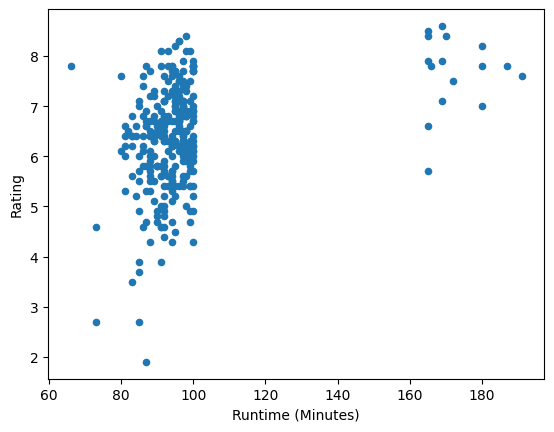

In [15]:
movies_between = imdb_movies[(imdb_movies['Runtime (Minutes)'] >= 165) | (imdb_movies['Runtime (Minutes)'] <= 100)]
movies_between.plot.scatter(x='Runtime (Minutes)', y='Rating')

### Question 2: which is the director with highest revenue per minute of runtime?

In [12]:
imdb_movies.head(5)

,Title,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors
Rank,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.13,76.0,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.46,65.0,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
3,Split,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,2016,123,6.2,393727,325.02,40.0,"Will Smith, Jared Leto, Margot Robbie, Viola D..."


In [38]:
# Divide revenue by runtime (unfiltered/not cleaned) 

imdb_movies.loc[imdb_movies['Runtime (Minutes)'] > 0,'Revenue by minute'] = imdb_movies['Revenue (Millions)'] / imdb_movies['Runtime (Minutes)']

                                                                        #row   #descending order
imdb_movies.groupby(['Director']).sum()['Revenue by minute'].sort_values(ascending = False)
#notice how some values are zero. this means that there are some NA values in the Revenue (Millions column)

Director
J.J. Abrams          12.841471
David Yates          11.950776
Francis Lawrence     10.243712
Christopher Nolan     9.738683
Michael Bay           9.423046
                       ...    
Ben Young             0.000000
Will Slocombe         0.000000
William Oldroyd       0.000000
Terry George          0.000000
Terry Jones           0.000000
Name: Revenue by minute, Length: 644, dtype: float64

In [39]:
imdb_movies_clean_revenue = imdb_movies[imdb_movies['Revenue (Millions)'].notna()]
imdb_movies_clean_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               872 non-null    object 
 1   Genre               872 non-null    object 
 2   Director            872 non-null    object 
 3   Year                872 non-null    int64  
 4   Runtime (Minutes)   872 non-null    int64  
 5   Rating              872 non-null    float64
 6   Votes               872 non-null    int64  
 7   Revenue (Millions)  872 non-null    float64
 8   Metascore           838 non-null    float64
 9   Actors              872 non-null    object 
 10  Revenue by minute   872 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 81.8+ KB


In [43]:
imdb_movies_clean_revenue['revenue_per_min']=imdb_movies_clean_revenue['Revenue (Millions)'] / imdb_movies_clean_revenue['Runtime (Minutes)']

C:\Users\hussainsarfraz\AppData\Local\Temp\ipykernel_756\352294999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_movies_clean_revenue['revenue_per_min']=imdb_movies_clean_revenue['Revenue (Millions)'] / imdb_movies_clean_revenue['Runtime (Minutes)']


In [44]:
imdb_movies_clean_revenue['revenue_per_min']

Rank
1       2.753140
2       1.019839
3       1.180513
4       2.502963
5       2.642439
          ...   
994     0.619897
995     0.621818
997     0.186596
998     0.591939
1000    0.225747
Name: revenue_per_min, Length: 872, dtype: float64

In [45]:
attr =[ "Director", "Rating", "revenue_per_min", 'Runtime (Minutes)', 'Revenue (Millions)']
grouped_by_director = imdb_movies_clean_revenue[attr].groupby('Director')
grouped_by_director.mean().sort_values(by="revenue_per_min", ascending=False)

,Rating,revenue_per_min,Runtime (Minutes),Revenue (Millions)
Director,,,,
Colin Trevorrow,7.0,5.259516,124.0,652.18
James Cameron,7.8,4.694506,162.0,760.51
Chris Renaud,6.6,4.233448,87.0,368.31
Lee Unkrich,8.3,4.028932,103.0,414.98
Chris Buck,7.5,3.928824,102.0,400.74
...,...,...,...,...
So Yong Kim,6.4,0.000119,84.0,0.01
Phillip Guzman,4.7,0.000101,99.0,0.01
Patricia Rozema,5.9,0.000099,101.0,0.01


### Question 3: which is the most common movie genre in our dataset between 2007 and 2014?

In [47]:
imdb_movies.head(5)

,Title,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors,Revenue by minute
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.13,76.0,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2.753140
2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.46,65.0,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",1.019839
3,Split,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",1.180513
4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2.502963
5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,2016,123,6.2,393727,325.02,40.0,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2.642439


In [52]:
# filter by year >= 2007 and year <=2014

YEARS = np.arange(2007, 2015)

print(imdb_movies.groupby(['Year']).max()['Genre'].filter(YEARS)) #the max function calculated the most occured genre

print()
print("Most common genre between 2007 and 2014 is:", imdb_movies.groupby(['Year']).max()['Genre'].filter(YEARS).max() )

2007                   Thriller
2008            Sci-Fi,Thriller
2009    Horror,Mystery,Thriller
2010           Mystery,Thriller
2011    Romance,Sci-Fi,Thriller
2012             Horror,Mystery
2013           Mystery,Thriller
2014                   Thriller
Name: Genre, dtype: object

Most common genre between 2007 and 2014 is: Thriller


### Question 4: which is the actor who has appeared in more movies between 2009 and 2015?

In [57]:
imdb_movies.head(5)

,Title,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors,Revenue by minute
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.13,76.0,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2.753140
2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.46,65.0,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",1.019839
3,Split,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",1.180513
4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2.502963
5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,2016,123,6.2,393727,325.02,40.0,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2.642439


In [62]:
#split the Actors column into separate columns (one per actor)
actors_df = imdb_movies['Actors'].str.split(",",expand=True,)

#add year column from original df
actors_df['Year']= imdb_movies['Year']

# rename columns for access
actors_df.columns = ['Actor1', 'Actor2', 'Actor3', 'Actor4', 'Year']

#drop rows if year < 2009 or year > 2015
actors_df = actors_df.drop(actors_df[(actors_df['Year'] < 2009) | (actors_df['Year'] > 2015)].index)

,Actor1,Actor2,Actor3,Actor4,Year
Rank,,,,,
1,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,2014
2,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,2012
27,Prabhas,Rana Daggubati,Anushka Shetty,Tamannaah Bhatia,2015
37,Matthew McConaughey,Anne Hathaway,Jessica Chastain,Mackenzie Foy,2014
46,Johnny Depp,Penélope Cruz,Ian McShane,Geoffrey Rush,2011
...,...,...,...,...,...
993,Topher Grace,Anna Faris,Dan Fogler,Teresa Palmer,2011
994,Milla Jovovich,Ali Larter,Wentworth Miller,Kim Coates,2010
995,Thomas Mann,Oliver Cooper,Jonathan Daniel Brown,Dax Flame,2012


In [64]:
print("Max of 1st Actor col:",actors_df['Actor1'].dropna().max())
print("Max of 2nd Actor col:",actors_df['Actor2'].dropna().max())
print("Max of 3rd Actor col:",actors_df['Actor3'].dropna().max())
print("Max of 4th Actor col:",actors_df['Actor4'].dropna().max())

Max of 1st Actor col: Zooey Deschanel
Max of 2nd Actor col: Billy Connolly
Max of 3rd Actor col: Seann William Scott
Max of 4th Actor col: Xavier Samuel


In [65]:
# Merge the four actor columns into a list, then find the most frequent

print()
print("Now merging the four actor columns into one column...")
merged_list = pd.concat( [ actors_df['Actor1'], actors_df['Actor2'], actors_df['Actor3'], actors_df['Actor4']])
print()
print("Length of the merged actor cols: ",len(merged_list))
print("Most popular actor between years 2009-2015 is: ",merged_list.dropna().max())


Now merging the four actor columns into one column...

Length of the merged actor cols:  2216
Most popular actor between years 2009-2015 is:  Zooey Deschanel


In [66]:
merged_list #stacks all of the columns on top of each other

Rank
1              Chris Pratt
2             Noomi Rapace
27                 Prabhas
37     Matthew McConaughey
46             Johnny Depp
              ...         
993          Teresa Palmer
994             Kim Coates
995              Dax Flame
996            Dean Norris
999       Shannon Woodward
Length: 2216, dtype: object